In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
path = 'LogiReg_data.txt'
pdData = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

In [19]:
pdData.shape

(100, 3)

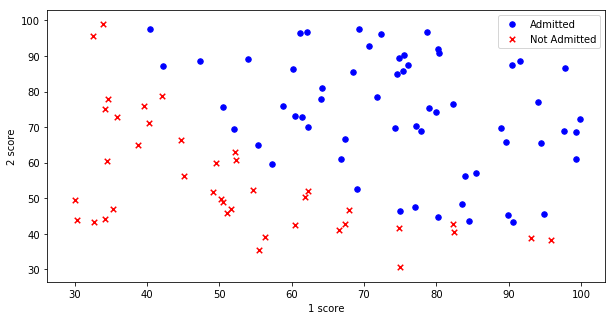

In [20]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s = 30, c = 'b', marker = 'o', label = 'Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('1 score')
ax.set_ylabel('2 score')

In [21]:
help(ax.scatter)

Help on method scatter in module matplotlib.axes._axes:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequen

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

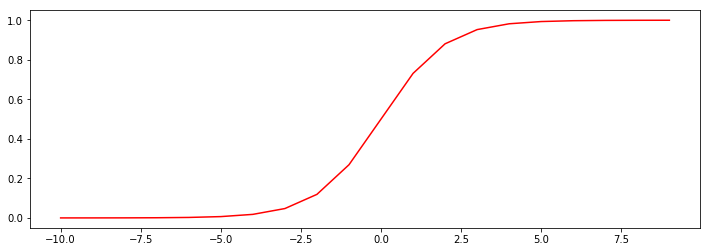

In [23]:
nums = np.arange(-10, 10, step = 1)
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(nums, sigmoid(nums), 'r')

In [24]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [25]:
pdData.insert(0, 'Ones', 1)
orig_data = pdData.as_matrix()
cols = orig_data.shape[1]
X = orig_data[:, 0:cols-1]
y = orig_data[:, cols-1:cols]

theta = np.zeros([1, 3])

In [37]:
X[:5]

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644]])

In [28]:
pd.head()

AttributeError: module 'pandas' has no attribute 'head'

In [29]:
pdData.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [30]:
theta

array([[ 0.,  0.,  0.]])

In [39]:
theta.shape

(1, 3)

In [33]:
y.shape

(100, 1)

In [35]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [36]:
cost(X, y, theta)

0.69314718055994529

In [38]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad